In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [3]:
! pip install -q kaggle

In [4]:
from google.colab import files

In [5]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harshu77","key":"83a9b4f0b98f16b081e321c303845b53"}'}

In [6]:
! mkdir ~/.kaggle

In [7]:
! cp kaggle.json ~/.kaggle/

In [8]:
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
! kaggle datasets list

ref                                                       title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                     Data Science Salaries 2023 💸                   25KB  2023-04-13 09:55:16          17335        474  1.0              
fatihb/coffee-quality-data-cqi                            Coffee Quality Data (CQI May-2023)             22KB  2023-05-12 13:06:39            635         26  1.0              
ashpalsingh1525/imdb-movies-dataset                       IMDB movies dataset                             3MB  2023-04-28 23:18:15           1634         42  1.0              
iammustafatz/diabetes-prediction-dataset                  Diabetes prediction dataset                   734KB  2023-04-0

In [10]:
!kaggle datasets download -d timoboz/tesla-stock-data-from-2010-to-2020

  0% 0.00/46.1k [00:00<?, ?B/s]
100% 46.1k/46.1k [00:00<00:00, 60.7MB/s]


In [11]:
!mkdir tesla

In [12]:
! unzip tesla-stock-data-from-2010-to-2020.zip -d tesla

Archive:  tesla-stock-data-from-2010-to-2020.zip
  inflating: tesla/TSLA.csv          


In [13]:
cd /content/tesla/

/content/tesla


In [14]:
import pandas as pd

In [15]:
df = pd.read_csv("TSLA.csv")

In [16]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [ ]:
df.shape #1692 rows and 7 columns that the data frame have 

(2416, 6)

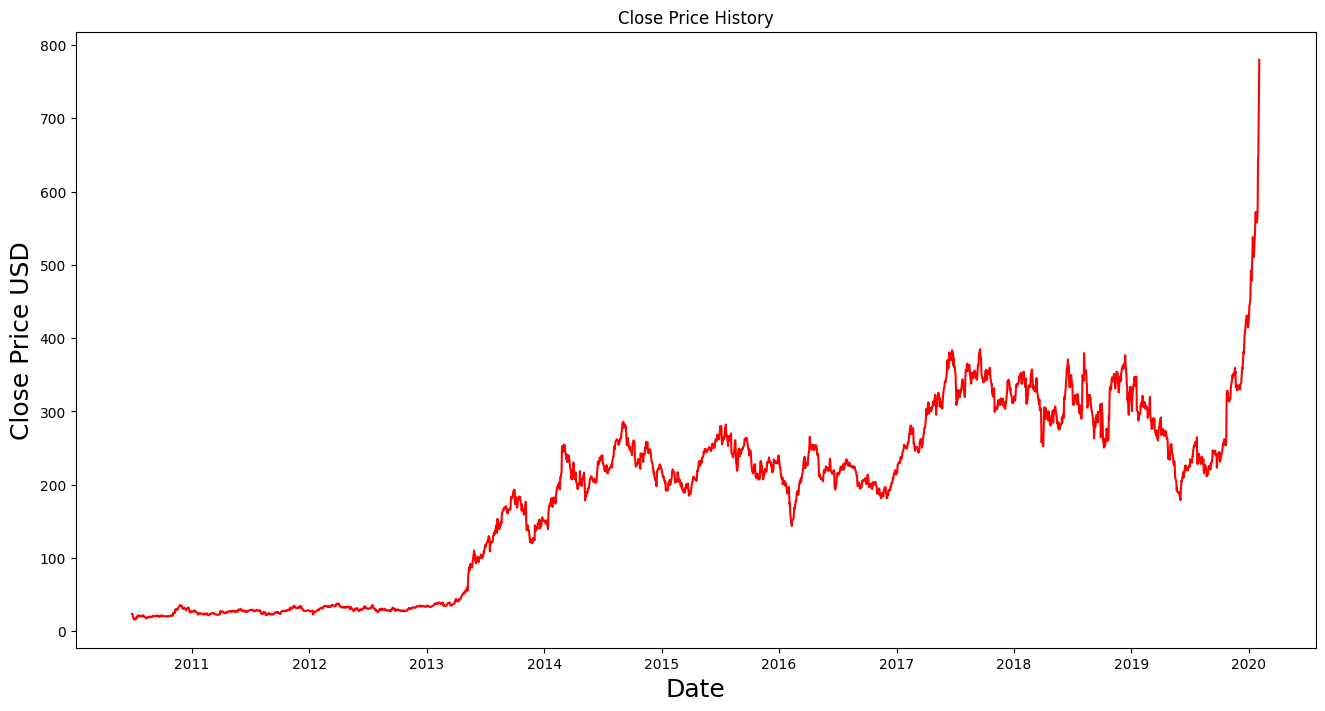

In [19]:
#plotting the data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [20]:
# create a new data frame with only 'Close column'
data = df.filter(['Close'])
dataset = data.values #convert the data frame to a numpy array
training_data_len = math.ceil(len(dataset)*.8)  # number of rows to train the model on
training_data_len


1933

In [21]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01058623],
       [0.01050772],
       [0.00806072],
       ...,
       [0.81786181],
       [0.83063335],
       [1.        ]])

In [22]:
#create the training dataset
#create the scaled training dataset

train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train, y_train datasets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.01058623, 0.01050772, 0.00806072, 0.0044491 , 0.00040565,
       0.        , 0.0021722 , 0.00209369, 0.0016357 , 0.00306202,
       0.00528657, 0.005352  , 0.00633342, 0.00799529, 0.00588851,
       0.00578382, 0.0068045 , 0.00718398, 0.00673907, 0.00621565,
       0.0064381 , 0.00595394, 0.00541743, 0.00669982, 0.00804763,
       0.00714473, 0.0060848 , 0.00495943, 0.00497252, 0.00422664,
       0.00274797, 0.0023554 , 0.00329757, 0.0038995 , 0.00438367,
       0.00388642, 0.00391259, 0.00431824, 0.00566605, 0.0044491 ,
       0.00536509, 0.0051688 , 0.00510338, 0.00532583, 0.00481549,
       0.0060848 , 0.00688301, 0.00686993, 0.00620257, 0.00667365,
       0.00642502, 0.0057184 , 0.0064381 , 0.00696153, 0.00808689,
       0.00672599, 0.00579691, 0.00688301, 0.00650353, 0.00532583])]
[0.004920176655325834]



In [23]:
#convert the x_train and y_train  to numppy array
x_train,y_train = np.array(x_train), np.array(y_train)

In [24]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(1873, 60, 1)

In [25]:
#Build the LSTM model
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

In [26]:
#Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
1873/1873 [==============================] - 35s 17ms/step - loss: 4.5305e-04
Epoch 2/10
1873/1873 [==============================] - 36s 19ms/step - loss: 1.7908e-04
Epoch 3/10
1873/1873 [==============================] - 37s 20ms/step - loss: 1.5623e-04
Epoch 4/10
1873/1873 [==============================] - 33s 17ms/step - loss: 1.5768e-04
Epoch 5/10
1873/1873 [==============================] - 32s 17ms/step - loss: 1.4306e-04
Epoch 6/10
1873/1873 [==============================] - 32s 17ms/step - loss: 1.1482e-04
Epoch 7/10
1873/1873 [==============================] - 31s 17ms/step - loss: 1.0660e-04
Epoch 8/10
1873/1873 [==============================] - 31s 17ms/step - loss: 9.9422e-05
Epoch 9/10
1873/1873 [==============================] - 31s 17ms/step - loss: 9.6863e-05
Epoch 10/10
1873/1873 [==============================] - 32s 17ms/step - loss: 1.0183e-04


In [ ]:
#create the testing data sets
#create a new array containing scale values from index 1543 to 2003
test_data= scaled_data[training_data_len-60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])


In [ ]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(483, 60, 1)

In [ ]:
#predicting the data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 1s 13ms/step


In [ ]:
#get the root mean square error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.48897968223909666

<ipython-input-35-33d98546dee5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


ValueError: ignored

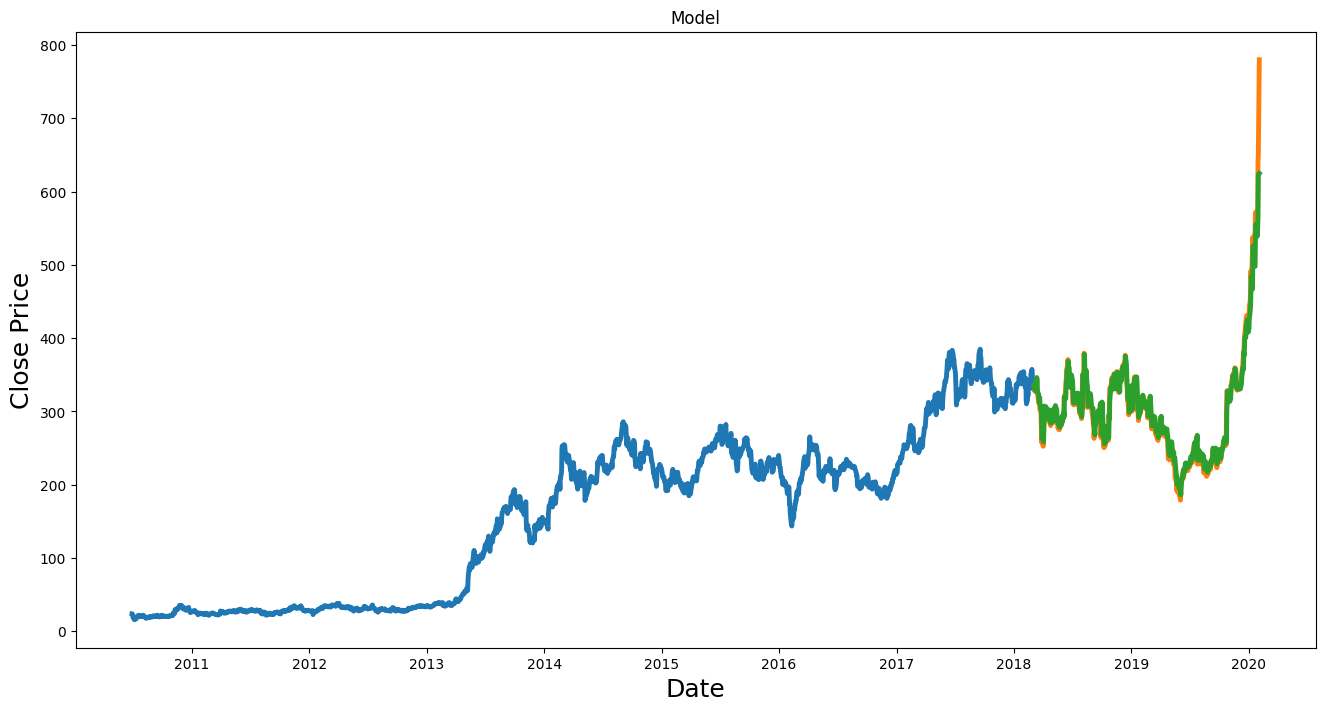

In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visialization the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='upper_center')

In [ ]:
#show the valid and predicted price
valid

,Close,Predictions
Date,,
2018-03-05,333.350006,336.033936
2018-03-06,328.200012,334.416626
2018-03-07,332.299988,329.061493
2018-03-08,329.100006,333.277740
2018-03-09,327.170013,330.072449
...,...,...
2020-01-28,566.900024,539.111023
2020-01-29,580.989990,549.921997
2020-01-30,640.809998,563.898376


In [ ]:
#get the quote
tesla_quote = pd.read_csv('TSLA.csv')
#Create new data frame
new_df = tesla_quote.filter(['Close'])
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scaled the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days 
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
#get the predicted scaled price
pred_price= model.predict(X_test)
#undo the scalling
pred_price = scaler.inverse_transform(pred_price)
pred_price

1/1 [==============================] - 0s 20ms/step


array([[751.4193]], dtype=float32)